<a href="https://colab.research.google.com/github/jasminejj08/Data-Science-Analyses/blob/main/DataScience_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Natural Language Processing (NLP)

In [ ]:
#Import the necessary libaries
import pandas as pd
import seaborn as sns
import urllib
from urllib import request
import requests
import nltk
import re
from nltk.tokenize import word_tokenize, sent_tokenize
import tokenize
from collections import Counter
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer, PorterStemmer
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Using the dataset about Shakespeare work

#URL for the dataset
url = "https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt"

#Open the URL, read the content and save it as text
response = urllib.request.urlopen(url)
data = response.read()
#Decode the data contents so that its in the correct format
content = data.decode('utf-8')

In [ ]:
#Create a new text file and store the contents of the dataset in this file
filename = "shakespeare_text.txt"
with open(filename, "w", encoding="utf8") as file:
  file.write(content)

In [ ]:
#Print part of the text to ensure it is correct
print(content[:805])

This is the 100th Etext file presented by Project Gutenberg, and
is presented in cooperation with World Library, Inc., from their
Library of the Future and Shakespeare CDROMS.  Project Gutenberg
often releases Etexts that are NOT placed in the Public Domain!!

Shakespeare

*This Etext has certain copyright implications you should read!*

<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM
SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS
PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE
WITH PERMISSION.  ELECTRONIC AND MACHINE READABLE COPIES MAY BE
DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS
PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED
COMMERCIALLY.  PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY
SERVICE THAT CHARGES FOR 


In [ ]:
#PREPARE FOR TEXT PROCESSING USING NLTK------------------------

#Use NLTK to tokenize the contents into words to create a list of words
word_list = nltk.word_tokenize(content)

#Display the first 50 words
print("Displaying the FIRST 50 WORDS: ")
for w in word_list[:50]:
  print(w)

Displaying the FIRST 50 WORDS: 
This
is
the
100th
Etext
file
presented
by
Project
Gutenberg
,
and
is
presented
in
cooperation
with
World
Library
,
Inc.
,
from
their
Library
of
the
Future
and
Shakespeare
CDROMS
.
Project
Gutenberg
often
releases
Etexts
that
are
NOT
placed
in
the
Public
Domain
!
!
Shakespeare
*
This


In [ ]:
#Create a list of sentences by tokenizing the content into sentences using nltk
sent_list = nltk.sent_tokenize(content)

#Display the first 10 sentences
print("Displaying the First 10 Sentences: ")
for s in sent_list[:10]:
  print(s)
  print('________________________________________________________\n')

Displaying the First 10 Sentences: 
This is the 100th Etext file presented by Project Gutenberg, and
is presented in cooperation with World Library, Inc., from their
Library of the Future and Shakespeare CDROMS.
________________________________________________________

Project Gutenberg
often releases Etexts that are NOT placed in the Public Domain!!
________________________________________________________

Shakespeare

*This Etext has certain copyright implications you should read!
________________________________________________________

*

<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM
SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS
PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE
WITH PERMISSION.
________________________________________________________

ELECTRONIC AND MACHINE READABLE COPIES MAY BE
DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS
PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED
COMMERCIALLY.
______

In [ ]:
#TEXT PROCESSING------------------------------------

#Remove the punctuation using the re library
clean_content = re.sub(r'[^\w\s]', '', content)

#Tokenize the clean content to create a list of words
clean_words = word_tokenize(clean_content)

#Create a count of each word in the text
word_count = Counter(clean_words)

In [ ]:
#Display the first 10 words and their frequency in the text
print("Displaying the First 10 Words and Their Frequency in Text:")
for word, count in list(word_count.items())[:10]:
  print(word + " : " + str(count))

Displaying the First 10 Words and Their Frequency in Text:
This : 1148
is : 8298
the : 23271
100th : 1
Etext : 5
file : 19
presented : 15
by : 2932
Project : 16
Gutenberg : 12


In [ ]:
#Sort the word counts in descending order
word_count_sorted = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

#Display the 10 most frequent words in the text
print("Displaying the 10 MOST FREQUENT WORDS in text: ")
for word, count in word_count_sorted[:10]:
  print(word + " : " + str(count))

Displaying the 10 MOST FREQUENT WORDS in text: 
the : 23271
I : 20371
and : 18599
to : 15838
of : 15707
a : 12666
you : 12040
my : 10831
in : 9861
not : 8785


In [ ]:
#Identify the stopwords in the text and display the 10 most frequent stopwords

#First create the list of stopwords using the NLTK stopwords list
stop_words = set(stopwords.words('english'))
stopwords_list = [w for w in clean_words if w.lower() not in stop_words]


In [ ]:
#Create a frequency distribution of the stopwords_list
stopwords_freq = nltk.FreqDist(stopwords_list)

#Display the 10 most frequent stopwords
print("Displaying the 10 MOST FREQUENT STOPWORDS")
for word, count in stopwords_freq.most_common(10):
  print(word + " : " + str(count))

Displaying the 10 MOST FREQUENT STOPWORDS
thou : 4558
thy : 3632
thee : 3159
shall : 3123
good : 2264
would : 2023
lord : 2018
Enter : 1987
love : 1955
man : 1781


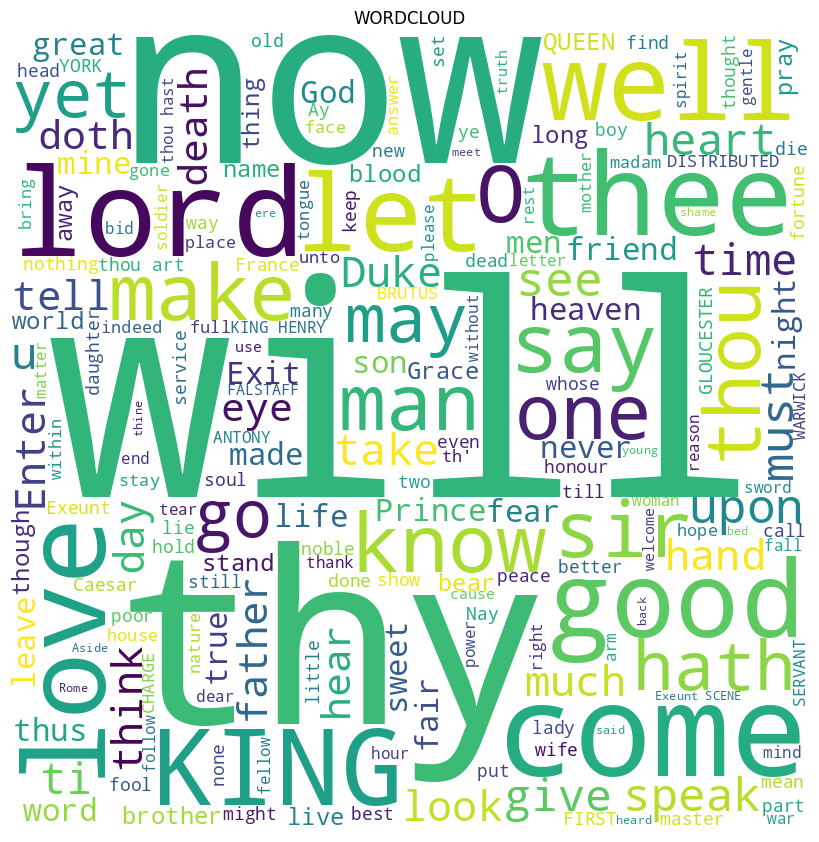

In [ ]:
#Generate a WordCloud image based off of the content
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(content)

#Display the WordCloud image
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("WORDCLOUD")

plt.show()

In [ ]:
#Apply text lemmatizationa nd stemming on the text

#Create a lemmatizer and lemmatize each word in the clean_words list
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(w) for w in clean_words]

#create a stemmer and stem each word in the clean_words list
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(w) for w in clean_words]

In [ ]:
#Display the first 10 stemmed words
print("Displaying the FIRST 10 STEMMED WORDS: ")
print(stemmed_words[:10])

Displaying the FIRST 10 STEMMED WORDS: 
['thi', 'is', 'the', '100th', 'etext', 'file', 'present', 'by', 'project', 'gutenberg']


In [ ]:
#Display the first 10 lammatized words
print("Displaying the FIRST 10 LAMMATIZED WORDS: ")
print(lemmatized_words[:10])

Displaying the FIRST 10 LAMMATIZED WORDS: 
['This', 'is', 'the', '100th', 'Etext', 'file', 'presented', 'by', 'Project', 'Gutenberg']


In [ ]:
#Q: WHAT IS THE MAIN DIFFERENCE BETWEEN THE TWO METHODS?
#(LAMMITIZATION VS. STEMMING)

#A: Lemmatization and Stemming are both text normalization techniques in NLP.
#Lemmatization is used to find the 'lemma' of a word depending on its meaning and context.
#Stemming is used to reduce an inflected word down to its stem (a common
#word which is called the 'stem'). This lets the 'stem' be the synonym of the
#words that were reduced to the stem.
#The main difference between the two methods is that lemmatization uses the
#content in which the word is being used whereas stemming simply uses the stem
#of the word.
#For example, stemming the word 'Caring' would return 'Car'
#but lemmatizing the word 'Caring' would return care. (Source 1)
#Stemming is faster than lemmatization due to it being more simple as it
#simply reduces the word to a base stem while lemmatization has to consider
#other factors while finding the 'lemma' (base form of all inflenction
#forms of the word). Thus, lemmatization is preferred.

Sources for Stemming vs Lemmatization:
https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/#:~:text=Stemming%20is%20a%20process%20that,'%20would%20return%20'Car'.

---------------------
https://www.guru99.com/stemming-lemmatization-python-nltk.html
